In [ ]:
using Pkg
Pkg.activate(joinpath(dirname(pwd()), "conf", "05_Ex4"))
Pkg.instantiate();

In [2]:
using Graphs, LinearAlgebra, GraphPlot, Plots, StatsBase;

In [3]:
A = [0 1 1; 1 0 0; 1 0 0]

3×3 Matrix{Int64}:
 0  1  1
 1  0  0
 1  0  0

In [4]:
G = Graph(A)

{3, 2} undirected simple Int64 graph

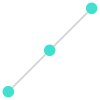

In [5]:
gplot(G)

In [6]:
myColors = ["indianred", "steelblue", "goldenrod", "seagreen"]

4-element Vector{String}:
 "indianred"
 "steelblue"
 "goldenrod"
 "seagreen"

In [7]:
initial_coloring = ["indianred", "steelblue", "goldenrod"]

3-element Vector{String}:
 "indianred"
 "steelblue"
 "goldenrod"

In [8]:
#We initialize a (not necessarily admissible!) random coloring
random_initial_coloring = function(G)
    coloring = [];
    for i=1:3 
        coloring = push!(coloring, myColors[rand(1:4)]);
    end
    return coloring;
end

#11 (generic function with 1 method)

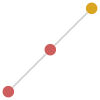

In [9]:
gplot(G, nodefillc = random_initial_coloring(G))

In [10]:
step! = function(coloring, G)
    rand_vertex = rand(1:3);
    rand_color = myColors[rand(1:4)]
    
    vertex_neighbors = neighbors(G, rand_vertex)
    if !(rand_color in coloring[vertex_neighbors])
        coloring[rand_vertex] = rand_color 
    end
    return coloring
end

#13 (generic function with 1 method)

In [11]:
step!(initial_coloring, G)

3-element Vector{String}:
 "indianred"
 "goldenrod"
 "goldenrod"

In [12]:
walk_length = 20;

sample_walk = function(coloring, G, walk_length)
    coloring = copy(coloring)
    for i=1:walk_length
        step!(coloring, G)
    end
    return coloring;
end

#15 (generic function with 1 method)

In [13]:
sample_walk(initial_coloring, G, 20)

3-element Vector{String}:
 "seagreen"
 "indianred"
 "indianred"

In [14]:
sample = [sample_walk(random_initial_coloring(G), G, 20) for _ in 1:1e5]

100000-element Vector{Vector{Any}}:
 ["goldenrod", "steelblue", "seagreen"]
 ["indianred", "seagreen", "steelblue"]
 ["goldenrod", "steelblue", "seagreen"]
 ["steelblue", "goldenrod", "indianred"]
 ["indianred", "goldenrod", "steelblue"]
 ["goldenrod", "seagreen", "steelblue"]
 ["steelblue", "goldenrod", "goldenrod"]
 ["steelblue", "goldenrod", "seagreen"]
 ["steelblue", "seagreen", "seagreen"]
 ["seagreen", "goldenrod", "steelblue"]
 ⋮
 ["indianred", "goldenrod", "steelblue"]
 ["indianred", "goldenrod", "steelblue"]
 ["indianred", "steelblue", "steelblue"]
 ["indianred", "steelblue", "steelblue"]
 ["steelblue", "indianred", "goldenrod"]
 ["seagreen", "steelblue", "steelblue"]
 ["indianred", "steelblue", "goldenrod"]
 ["goldenrod", "steelblue", "indianred"]
 ["goldenrod", "seagreen", "steelblue"]

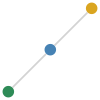

In [15]:
gplot(G, nodefillc = rand(sample))

In [16]:
all_colorings = unique(sample)
datamap = countmap(sample)

Dict{Vector{Any}, Int64} with 37 entries:
  ["steelblue", "indianred", "steelblue"] => 1
  ["seagreen", "steelblue", "goldenrod"]  => 2818
  ["seagreen", "goldenrod", "indianred"]  => 2753
  ["steelblue", "seagreen", "indianred"]  => 2726
  ["indianred", "goldenrod", "goldenrod"] => 2801
  ["steelblue", "indianred", "indianred"] => 2709
  ["steelblue", "goldenrod", "seagreen"]  => 2756
  ["seagreen", "steelblue", "indianred"]  => 2772
  ["indianred", "seagreen", "seagreen"]   => 2925
  ["goldenrod", "steelblue", "indianred"] => 2733
  ["steelblue", "seagreen", "seagreen"]   => 2802
  ["indianred", "seagreen", "steelblue"]  => 2836
  ["indianred", "goldenrod", "seagreen"]  => 2739
  ["goldenrod", "seagreen", "steelblue"]  => 2739
  ["seagreen", "indianred", "indianred"]  => 2807
  ["goldenrod", "indianred", "indianred"] => 2842
  ["goldenrod", "seagreen", "indianred"]  => 2724
  ["steelblue", "indianred", "seagreen"]  => 2723
  ["steelblue", "seagreen", "goldenrod"]  => 2753
  ⋮        

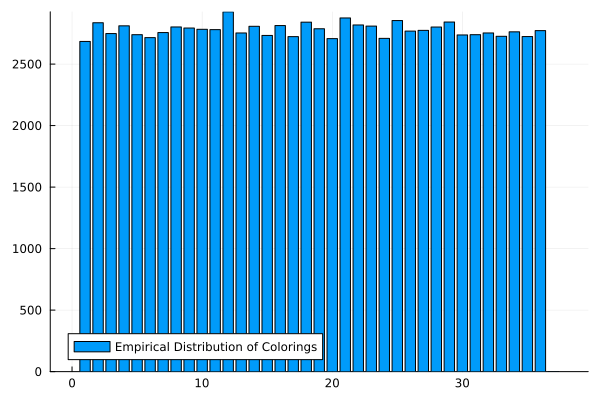

In [17]:
bar((x -> datamap[x]).(all_colorings), label = "Empirical Distribution of Colorings")

In [18]:
10^5/36

2777.777777777778

In [19]:
collect(values(datamap))

37-element Vector{Int64}:
    1
 2818
 2753
 2726
 2801
 2709
 2756
 2772
 2925
 2733
    ⋮
 2768
 2809
 2762
 2715
 2875
 2684
 2737
 2774
 2811

In [20]:
collect(keys(datamap))[27]

3-element Vector{Any}:
 "indianred"
 "steelblue"
 "steelblue"